# 可视化分析商品(bra)的特点

In [1]:
'''导入需要的包'''
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')    # 设置绘图风格
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 28, 18
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签

In [2]:
'''导入数据，读取CSV数据'''
df_data = pd.read_csv("D:/Python_Homework/2020.11.18/bra/bra.csv")
color_data = pd.read_csv("D:/Python_Homework/2020.11.18/bra/colors.csv")

FileNotFoundError: [Errno 2] File D:/Python_Homework/2020.11.18/bra/bra.csv does not exist: 'D:/Python_Homework/2020.11.18/bra/bra.csv'

In [ ]:
'''查看数据属性'''
df_data.info()

In [ ]:
color_data.info()

## 查看数据信息

In [ ]:
df_data.head(10)

In [ ]:
df_data.tail(10)

In [ ]:
color_data.head(10)

In [ ]:
def clean_data(df_data, color_data):
    '''清洗颜色数据'''
    df_data = pd.merge(df_data, color_data, left_on='productColor', right_on='0')
    df_data = df_data.drop(columns=['productColor', 'Unnamed: 0', '0']).rename(columns={'1':'productColor'})
    
    '''设置尺码的正则表达式'''
    pattern_one = re.compile(r'[7-9]\d[A-Z]')
    pattern_two = re.compile(r'[A-Z][7-9]\d')
    for i in range(len(df_data)):
        try:
#             '''清洗颜色数据'''
#             if df_data['productColor'][i] in list(color_data['0']):
#                 df_data['productColor'][i] = list(color_data.iloc[color_data[color_data['0'] == df_data['productColor'][i]].index]['1'])[0]
#                 print(color_data.iloc[color_data[color_data['0'] == df_data['productColor'][i]].index]['1'])
            
#             df_data['productColor'][i] = ''.join(i for i in df_data['productColor'][i] if not i.isdigit())
            
            '''清洗尺码'''
            re_data_one = pattern_one.findall(df_data['productSize'][i])
            re_data_two = pattern_two.findall(df_data['productSize'][i])
            if re_data_one:
                df_data['productSize'][i] = re_data_one[0]
            if re_data_two:
                df_data['productSize'][i] = df_data['productSize'][i][1:] + df_data['productSize'][i][0]
            if re.compile(r'\d{2}/\d{2}[A-Z]').findall(df_data['productSize'][i]):
                df_data['productSize'][i] = max(re.compile(r'\d{2}').findall(df_data['productSize'][i])) + df_data['productSize'][i][-1]
            
            else:
                continue
        except:
            continue
            
    return df_data
            

In [ ]:
df_data = clean_data(df_data, color_data)
df_data.dropna(axis=0, how='any', inplace=True)
df_data.reset_index(drop=True)

In [ ]:
df_data.head(15)

In [ ]:
color_info = df_data['productColor'].value_counts(ascending=True)

In [ ]:
color = color_info.keys()
color_count = color_info.values

NameError: name 'color' is not defined

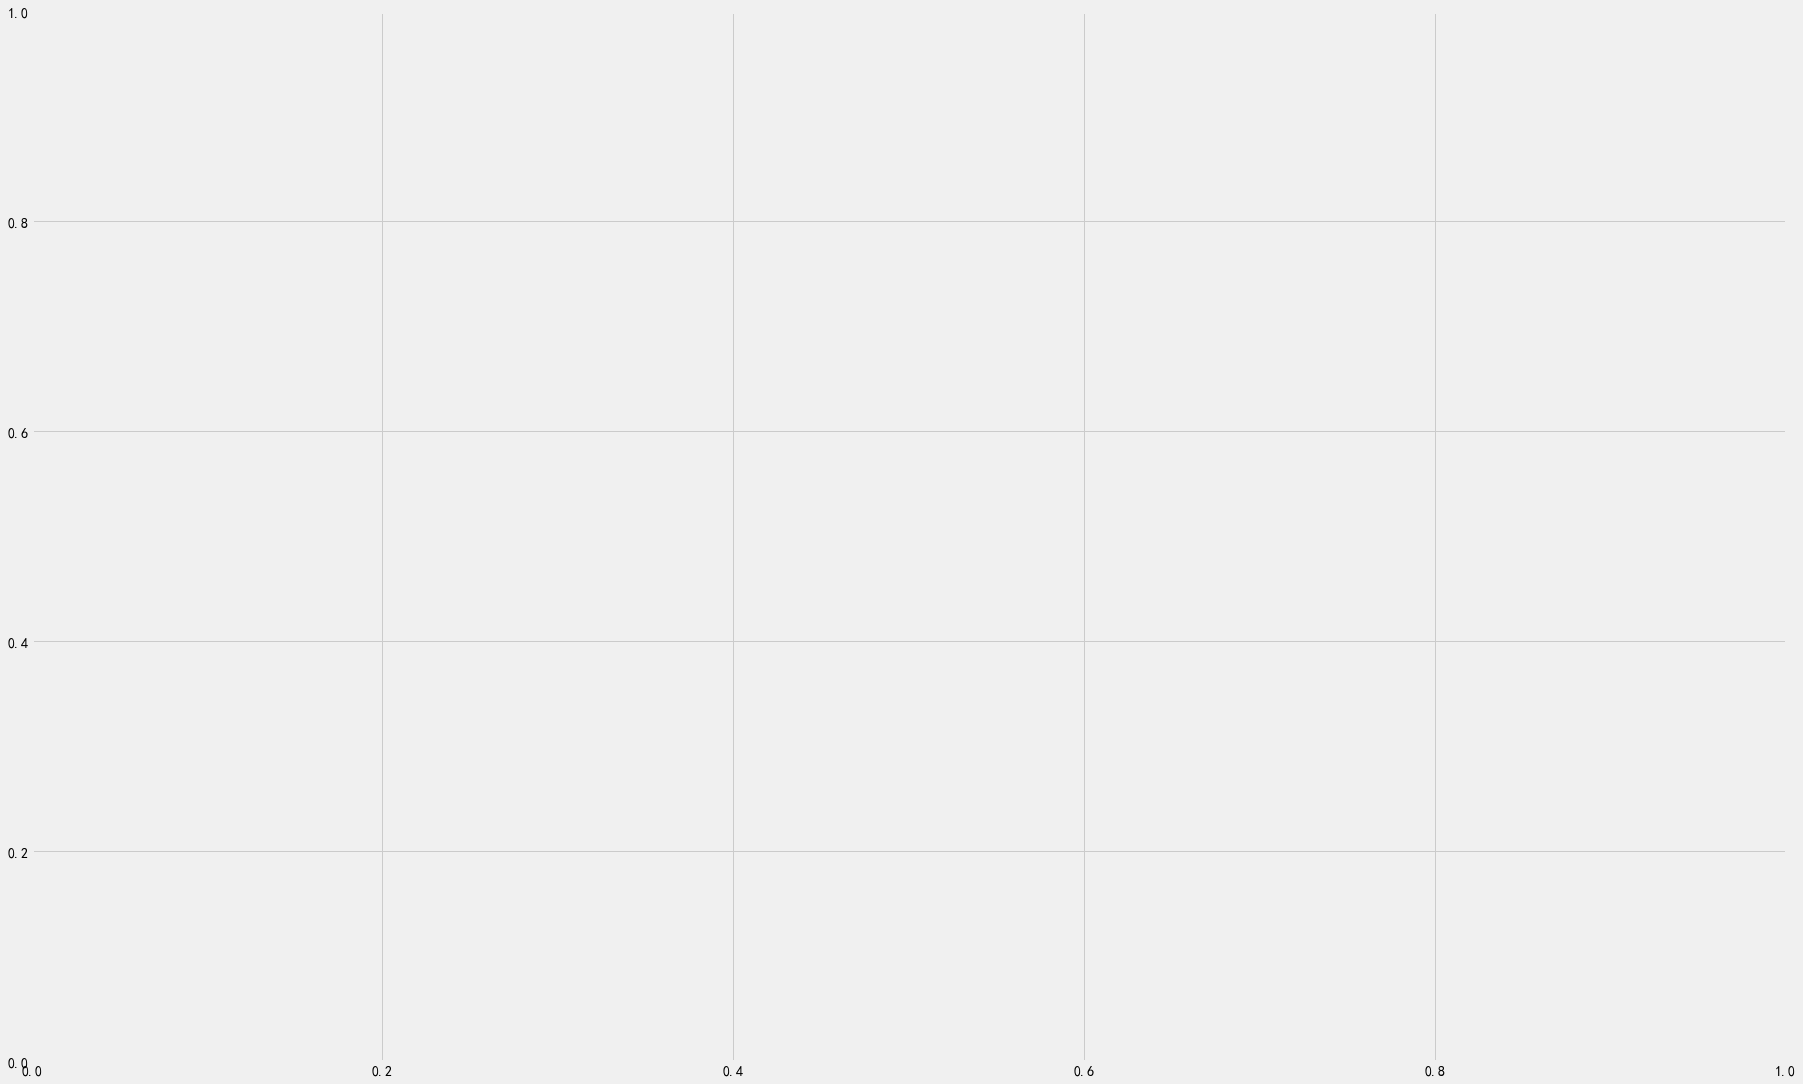

In [3]:
fig, ax = plt.subplots()
x_label = color
x_tick = np.arange(len(color))
plt.bar(x_tick, color_count, align = 'center', alpha = 0.5)
fig.suptitle(u"bra颜色分类统计", fontsize= 20)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('颜色', fontsize = 20)
plt.show()

In [ ]:
size_info = df_data['productSize'].value_counts(ascending=True)
size = size_info.keys()
size_count = size_info.values

In [ ]:
size_info

In [ ]:
fig, ax = plt.subplots()
x_label = size
x_tick = np.arange(len(size))
plt.bar(x_tick, size_count, align = 'center', alpha = 0.5)
fig.suptitle(u"bra尺码分类统计", fontsize= 20)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('尺码', fontsize = 20)
plt.show()